# Complex systems simulation

Kevin: This is the closest algorithm I can formulate when analyzing the papers. Maybe it'll be useful. Please tell me or correct it if you think something is missing or wrong here. I find that it resembles the BTW algorithm somewhat, so we'll probably find some SOC by that resemblance alone. I added both the dynamics synapses and leak parts. I think they can be ignored quite easily if we don't want those elements though.

## (Leaky) integrate and fire algorithm with LHG dynamics

1. Initialize network with potentials $V_i$ for the node values and Synaptic strengths $J_{ij}$ for the link values with $J_{ij} \neq J_{ji}$

2. Initialize parameters:
    - $V^{ext}$: External input into membrane potential
    - $u$: Transmitter resource usage / saturation constant of synaptic strength
    - $V^{th}$: Membrane potential threshold
    - $\alpha$: Maximum connection strength parameter (Dynamic synapses)
    - $\tau_{J}$: Synaptic strength relaxation time (Dynamic synapses)
    - $\tau_l$: Leak time constant (leak term)
    - $C$: Compensatory synaptic current (leak term)

3. Drive step:
    - $V_j \gets V_j - \frac{V_j}{\tau_l} + C$ for all neurons $j$
    - Randomly select a neuron i
    - $V_i \gets V_i + V^{ext}$ (Forward Euler)

4. Relaxation step:
    - For all neighbors $j$ of $i$, if $V_i > V^{th}$:
        - $V_j \gets V_j + \frac{u J_{ji}}{N_i}$
    
    - $V_i \gets V_i - V^{th}$
    - Repeat for all cases of $j$ where $V_j > V^{th}$
    
5. Update synaptic strength:
    - $J_{ij} \gets J_{ij} + \frac{1}{\tau_l}\left( \frac{\alpha}{u} - J_{ij} \right) - u J_{ij}$ for all spiked synapses
    - $J_{ij} \gets J_{ij} + \frac{1}{\tau_l}\left( \frac{\alpha}{u} - J_{ij} \right)$ for all unused synapses

6. Go back to step 3 or terminate algorithm

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import integrate_and_fire as int_fire

## Test simple integrate and fire model

In [2]:
network = int_fire.create_if_network(300,net_type="full")

model = int_fire.simple_integrate_and_fire_model(network,J=4)

model.simulate(10000)

model.reset_avalanche_stats()

model.simulate(1000000)

100%|██████████| 1000000/1000000 [06:25<00:00, 2593.57it/s]


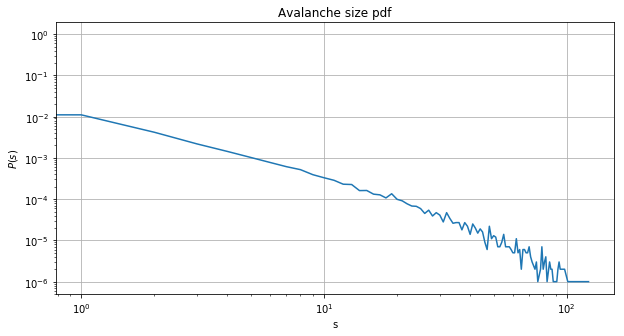

In [3]:
plt.figure(figsize=(10,5))
plt.title("Avalanche size pdf")
plt.ylabel(r"$P(s)$")
plt.xlabel(r"s")

indices,pdf = model.avalanche_size_pdf()

plt.plot(indices,pdf)
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.show()

## Test LHG model

In [17]:
network = int_fire.create_if_network(100,net_type="full")

model = int_fire.LHG_integrate_and_fire_model(network,a=0.95)

model.simulate(10000)

model.reset_avalanche_stats()

model.simulate(1000000)

100%|██████████| 1000000/1000000 [32:01<00:00, 520.33it/s]


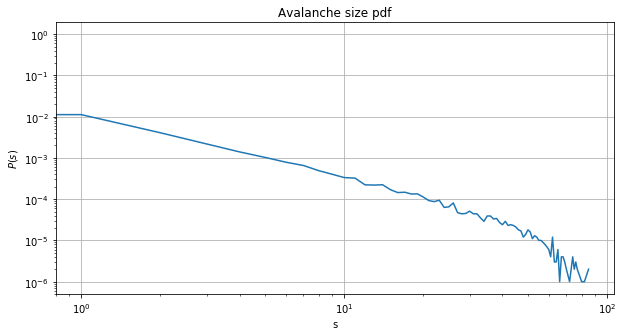

In [18]:
plt.figure(figsize=(10,5))
plt.title("Avalanche size pdf")
plt.ylabel(r"$P(s)$")
plt.xlabel(r"s")

indices,pdf = model.avalanche_size_pdf()

plt.plot(indices,pdf)
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.show()